# Sales Analysis

In [34]:
# importando librerias
import pandas as pd
import os
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 9)

**Task # 1: merge the 12 months of sales data into a single CSV file** 

In [6]:
files = [file for file in os.listdir('./sales')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./sales/'+file)
    all_months_data = pd.concat([all_months_data, df])
    

all_months_data.to_csv('./sales/all_data.csv', index = False)

In [11]:
data = pd.read_csv('./sales/all_data.csv')
data.columns = ['OrderID', 'producto','cantidad', 'precio_unitario','fecha_orden', 'direccion_compra' ]
data.sample(5)

,OrderID,producto,cantidad,precio_unitario,fecha_orden,direccion_compra
82921,228314,Bose SoundSport Headphones,1,99.99,07/25/19 15:50,"154 Chestnut St, Austin, TX 73301"
126182,199498,20in Monitor,1,109.99,05/27/19 16:57,"600 Dogwood St, Portland, OR 97035"
63685,158299,Macbook Pro Laptop,1,1700,02/24/19 16:02,"512 Ridge St, San Francisco, CA 94016"
44189,308826,Apple Airpods Headphones,1,150,12/11/19 19:21,"354 Lake St, Austin, TX 73301"
78254,223855,Google Phone,1,600,07/04/19 09:46,"283 Park St, Boston, MA 02215"


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   OrderID           186305 non-null  object
 1   producto          186305 non-null  object
 2   cantidad          186305 non-null  object
 3   precio_unitario   186305 non-null  object
 4   fecha_orden       186305 non-null  object
 5   direccion_compra  186305 non-null  object
 6   mes               186305 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB


clean up the data

__limpiar los datos__

drop rows of NAN

__limpiar filas de NAN__

In [19]:
nan_df = data[data.isna().any(axis=1)]
nan_df.sample(3)

,OrderID,producto,cantidad,precio_unitario,fecha_orden,direccion_compra,mes
126909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24457,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data = data.dropna(how='all')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   OrderID           186305 non-null  object
 1   producto          186305 non-null  object
 2   cantidad          186305 non-null  object
 3   precio_unitario   186305 non-null  object
 4   fecha_orden       186305 non-null  object
 5   direccion_compra  186305 non-null  object
 6   mes               186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [25]:
# find Or and delete it
data = data[data['fecha_orden'].str[0:2] != 'Or']
data.sample(3)

,OrderID,producto,cantidad,precio_unitario,fecha_orden,direccion_compra,mes
101578,219390,Lightning Charging Cable,1,14.95,06/22/19 06:55,"452 11th St, San Francisco, CA 94016",06
61531,156243,AAA Batteries (4-pack),1,2.99,02/21/19 20:57,"422 Jefferson St, San Francisco, CA 94016",02
167587,271581,USB-C Charging Cable,2,11.95,10/14/19 09:11,"607 13th St, Los Angeles, CA 90001",10


augment data with additional columns

__aumentar los datos con columnas adicionales__

Task 2: add month column

__Tarea 2: agregar la columna del mes__

In [26]:
data['mes'] = data['fecha_orden'].str[0:2]
data['mes'] = data['mes'].astype('int32')
data.sample(2)

,OrderID,producto,cantidad,precio_unitario,fecha_orden,direccion_compra,mes
47833,312335,USB-C Charging Cable,1,11.95,12/01/19 20:55,"874 12th St, San Francisco, CA 94016",12
138000,279634,Lightning Charging Cable,1,14.95,11/18/19 10:35,"575 1st St, San Francisco, CA 94016",11


task 3: add a sales column
    
__tarea 3: agregar una columna de ventas__

In [43]:
data['cantidad'] = pd.to_numeric(data['cantidad'])
data['precio_unitario'] = pd.to_numeric(data['precio_unitario'])
data['ventas'] = data['cantidad'] * data['precio_unitario']
data.head(3)

,OrderID,producto,cantidad,precio_unitario,fecha_orden,direccion_compra,mes,ventas
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OrderID           185950 non-null  object 
 1   producto          185950 non-null  object 
 2   cantidad          185950 non-null  int64  
 3   precio_unitario   185950 non-null  float64
 4   fecha_orden       185950 non-null  object 
 5   direccion_compra  185950 non-null  object 
 6   mes               185950 non-null  int32  
 7   ventas            185950 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 12.1+ MB


task 4: add a city column

__tarea 4: agregar una columna de ciudad__

In [57]:
# lest's use.apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2][0:3:]


data['ciudad'] = data['direccion_compra'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
data.sample(3)

,OrderID,producto,cantidad,precio_unitario,fecha_orden,direccion_compra,mes,ventas,ciudad
139329,280907,Apple Airpods Headphones,1,150.00,11/29/19 18:37,"675 South St, Boston, MA 02215",11,150.00,Boston ( MA)
114905,171218,USB-C Charging Cable,1,11.95,03/01/19 04:42,"498 5th St, Austin, TX 73301",3,11.95,Austin ( TX)
95691,213767,34in Ultrawide Monitor,1,379.99,06/25/19 11:52,"351 Lake St, New York City, NY 10001",6,379.99,New York City ( NY)


question 1: what was the best month for sales? how much was earned that month?

__pregunta 1: ¿cuál fue el mejor mes para las ventas? ¿cuanto se gano ese mes?__

In [32]:
data.groupby('mes').agg(['mean', 'count', 'sum'])

C:\Users\jorge.callejo\AppData\Local\Temp\ipykernel_11980\3848940359.py:1: FutureWarning: ['producto', 'fecha_orden', 'direccion_compra'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('mes').agg(['mean', 'count', 'sum'])


OrderID                                                            \
       mean  count                                                sum   
mes                                                                     
1       inf   9709  2971502978172978172979692983442990492991253003...   
2       inf  11975  1505021505031505041505051505061505071505081505...   
3       inf  15153  1505331505411508121517491520361532841535441538...   
4       inf  18279  1765581765591765601765601765611765621765631765...   
5       inf  16566  1769781775511777781777781790761790761791341800...   
6       inf  13554  2099212099222099232099242099252099262099272099...   
7       inf  14293  2229102229112229122229132229142229152229162229...   
8       inf  11961  2366702366712366722366732366742366752366762366...   
9       inf  11621  2388342392852406362410542423432428652436672449...   
10      inf  20282  2593582593592593602593612593622593632593642593...   
11      inf  17573  2787972787982787992788002788012788022788032788...   
12      inf  24984  2956652956662956672956682956692956702956712956...   

     cantidad               precio_unitario                         ventas  \
         mean  count    sum            mean  count         sum        mean   
mes                                                                          
1    1.122979   9709  10903      186.607105   9709  1811768.38  187.687376   
2    1.123090  11975  13449      182.787868  11975  2188884.72  183.884962   
3    1.122220  15153  17005      184.201665  15153  2791207.83  185.250471   
4    1.124679  18279  20558      184.237158  18279  3367671.02  185.495390   
5    1.126826  16566  18667      189.250581  16566  3135125.13  190.305852   
6    1.125350  13554  15253      189.023580  13554  2562025.61  190.187565   
7    1.124467  14293  16072      184.183835  14293  2632539.56  185.249826   
8    1.124321  11961  13448      186.468140  11961  2230345.42  187.648849   
9    1.128044  11621  13109      179.415893  11621  2084992.09  180.497387   
10   1.119367  20282  22703      183.194696  20282  3715554.83  184.238580   
11   1.126615  17573  19798      180.993608  17573  3180600.68  182.074956   
12   1.125280  24984  28114      183.654155  24984  4588415.41  184.655913   

                        
     count         sum  
mes                     
1     9709  1822256.73  
2    11975  2202022.42  
3    15153  2807100.38  
4    18279  3390670.24  
5    16566  3152606.75  
6    13554  2577802.26  
7    14293  2647775.76  
8    11961  2244467.88  
9    11621  2097560.13  
10   20282  3736726.88  
11   17573  3199603.20  
12   24984  4613443.34

In [35]:
result = data.groupby('mes').sum()

C:\Users\jorge.callejo\AppData\Local\Temp\ipykernel_11980\3016398774.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = data.groupby('mes').sum()


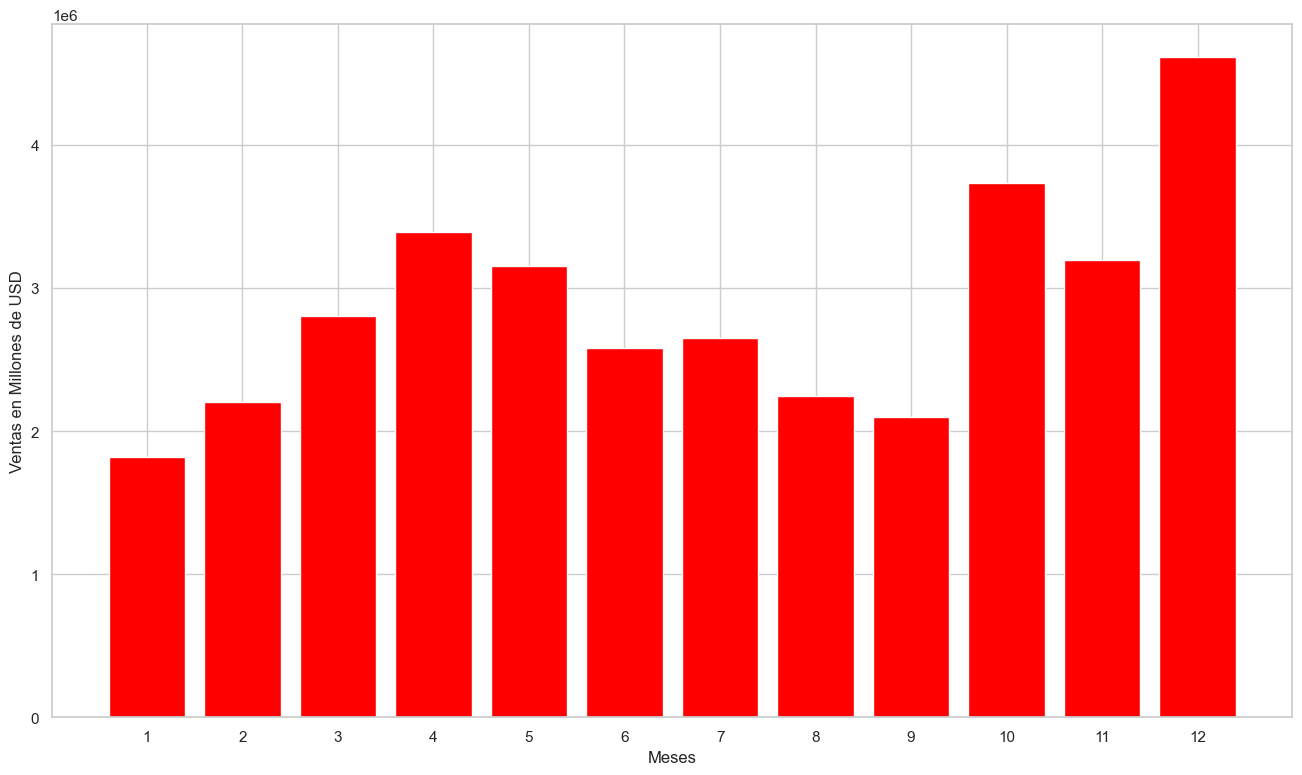

In [41]:
months = range(1,13)

mpl.bar(months, result['ventas'], color='red')
mpl.xticks(months)
mpl.xlabel('Meses')
mpl.ylabel('Ventas en Millones de USD')
mpl.show()

question 2: what cityhad the highest number of sales

__pregunta 2: qué ciudad tuvo el mayor número de ventas__

In [60]:
results = data.groupby(['ciudad']).sum()
results

C:\Users\jorge.callejo\AppData\Local\Temp\ipykernel_11980\2221303676.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = data.groupby(['ciudad']).sum()


,cantidad,precio_unitario,mes,ventas
ciudad,,,,
Atlanta ( GA),16602,2779908.20,104794,2795498.58
Austin ( TX),11153,1809873.61,69829,1819581.75
Boston ( MA),22528,3637409.77,141112,3661642.01
Dallas ( TX),16730,2752627.82,104620,2767975.40
Los Angeles ( CA),33289,5421435.23,208325,5452570.80
New York City ( NY),27932,4635370.83,175741,4664317.43
Portland ( ME),2750,447189.25,17144,449758.27
Portland ( OR),11303,1860558.22,70621,1870732.34
San Francisco ( CA),50239,8211461.74,315520,8262203.91


In [68]:
data['ciudad'] = data['ciudad'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OrderID           185950 non-null  object 
 1   producto          185950 non-null  object 
 2   cantidad          185950 non-null  int64  
 3   precio_unitario   185950 non-null  float64
 4   fecha_orden       185950 non-null  object 
 5   direccion_compra  185950 non-null  object 
 6   mes               185950 non-null  int32  
 7   ventas            185950 non-null  float64
 8   ciudad            185950 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 13.5+ MB


In [86]:
# cities = data['ciudad'].unique()
cities = [city for city, df in data.groupby('ciudad')]

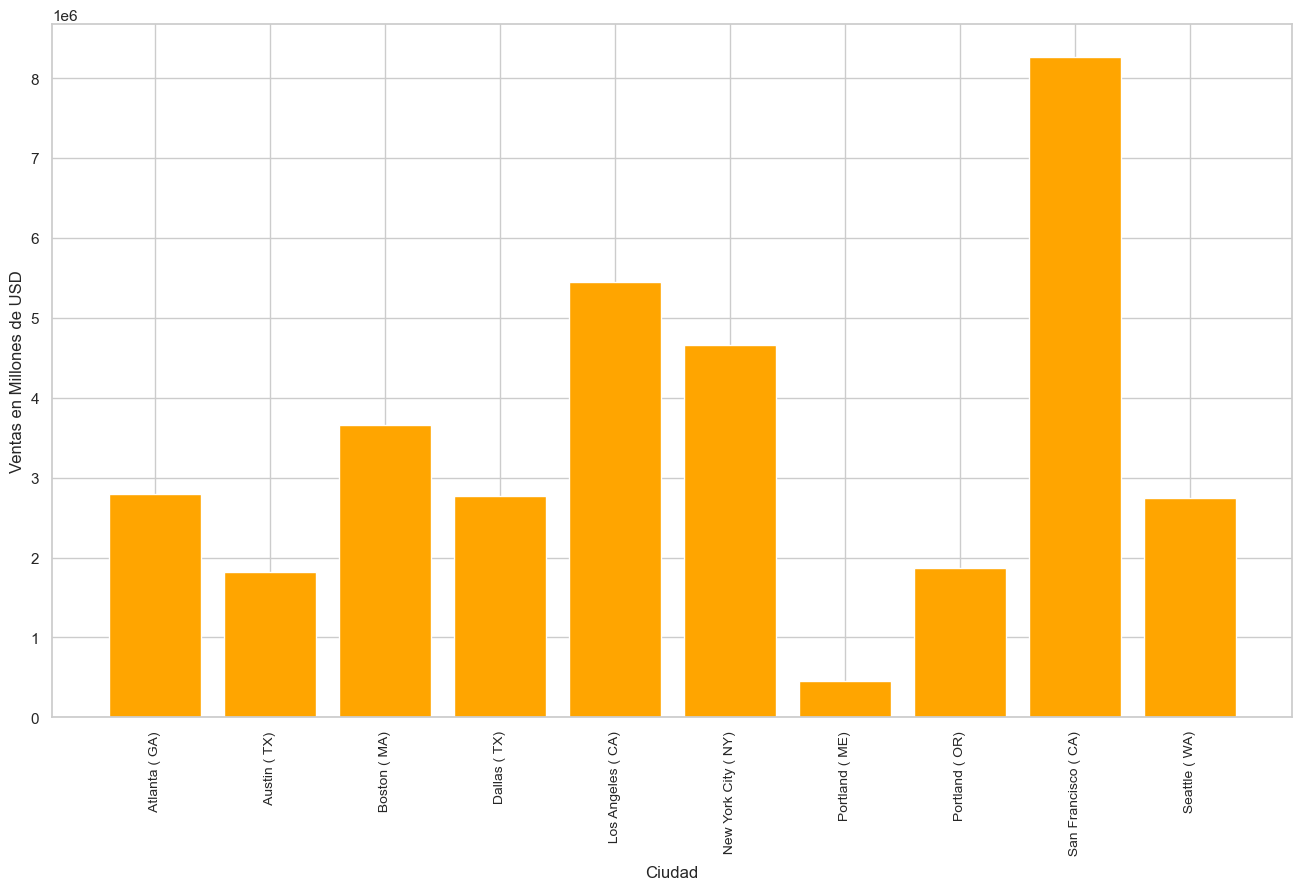

In [87]:
mpl.bar(cities, results['ventas'], color='orange')
mpl.xticks(cities, rotation='vertical', size=10)
mpl.xlabel('Ciudad')
mpl.ylabel('Ventas en Millones de USD')
mpl.show()

question 3: what time should we display advertisements to maximize likelihood of customer's buying product?

__pregunta 3: ¿a qué hora debemos mostrar anuncios para maximizar la probabilidad de que el cliente compre el producto?__

In [89]:
data['fecha_orden'] = pd.to_datetime(data['fecha_orden'])
data.head()

,OrderID,producto,cantidad,precio_unitario,fecha_orden,direccion_compra,mes,ventas,ciudad
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas ( TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston ( MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles ( CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA)


In [92]:
data['hora'] = data['fecha_orden'].dt.hour
data['minuto'] = data['fecha_orden'].dt.minute
data['segundos'] = data['fecha_orden'].dt.second
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   OrderID           185950 non-null  object        
 1   producto          185950 non-null  object        
 2   cantidad          185950 non-null  int64         
 3   precio_unitario   185950 non-null  float64       
 4   fecha_orden       185950 non-null  datetime64[ns]
 5   direccion_compra  185950 non-null  object        
 6   mes               185950 non-null  int32         
 7   ventas            185950 non-null  float64       
 8   ciudad            185950 non-null  object        
 9   hora              185950 non-null  int64         
 10  minuto            185950 non-null  int64         
 11  segundos          185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(4)
memory usage: 17.7+ MB


In [93]:
hours = [hour for hour, df in data.groupby('hora')]

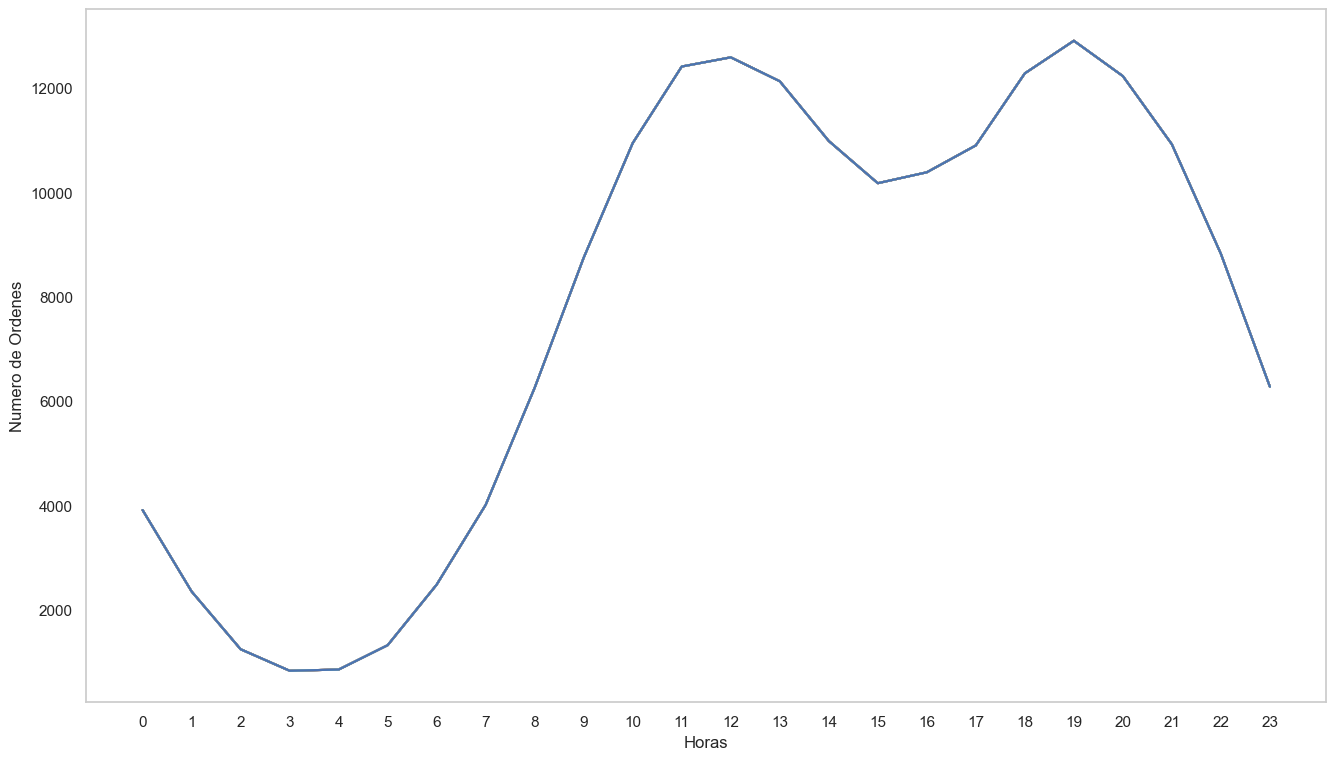

In [101]:
mpl.plot(hours, data.groupby(['hora']).count())
mpl.xticks(hours)
mpl.grid()
mpl.xlabel('Horas')
mpl.ylabel('Numero de Ordenes')
mpl.show()

In [96]:
data.groupby(['hora']).count()

,OrderID,producto,cantidad,precio_unitario,fecha_orden,direccion_compra,mes,ventas,ciudad,minuto,segundos
hora,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


question 4: what products are most often sold together?

__pregunta 4: ¿qué productos se venden juntos con más frecuencia?__

,OrderID,producto,cantidad,precio_unitario,fecha_orden,direccion_compra,mes,ventas,ciudad,hora,minuto,segundos
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas ( TX),8,46,0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston ( MA),22,30,0
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles ( CA),14,38,0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA),14,38,0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA),9,27,0


In [109]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df =  data[data['OrderID'].duplicated(keep=False)]
df.head(10)

,OrderID,producto,cantidad,precio_unitario,fecha_orden,direccion_compra,mes,ventas,ciudad,hora,minuto,segundos
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles ( CA),14,38,0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles ( CA),14,38,0
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles ( CA),19,42,0
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles ( CA),19,42,0
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston ( MA),11,31,0
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston ( MA),11,31,0
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco ( CA),17,0,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco ( CA),17,0,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City ( NY),11,7,0
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City ( NY),11,7,0


In [110]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['producto_agrupado'] = df.groupby('OrderID')['producto'].transform(lambda x: ','.join(x))
df = df[['OrderID', 'producto_agrupado']].drop_duplicates()
df.head(3)

C:\Users\jorge.callejo\AppData\Local\Temp\ipykernel_11980\776253538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['producto_agrupado'] = df.groupby('OrderID')['producto'].transform(lambda x: ','.join(x))


,OrderID,producto_agrupado
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [115]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['producto_agrupado']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # el segundo parametro puede ser cambiado de acuerdo a requerimiento

    
# print(count)
for key, value in count.most_common(10):
    print(f"Los articulos son: {key}, unidades: {value}")

Los articulos son: ('iPhone', 'Lightning Charging Cable'), unidades: 1005
Los articulos son: ('Google Phone', 'USB-C Charging Cable'), unidades: 987
Los articulos son: ('iPhone', 'Wired Headphones'), unidades: 447
Los articulos son: ('Google Phone', 'Wired Headphones'), unidades: 414
Los articulos son: ('Vareebadd Phone', 'USB-C Charging Cable'), unidades: 361
Los articulos son: ('iPhone', 'Apple Airpods Headphones'), unidades: 360
Los articulos son: ('Google Phone', 'Bose SoundSport Headphones'), unidades: 220
Los articulos son: ('USB-C Charging Cable', 'Wired Headphones'), unidades: 160
Los articulos son: ('Vareebadd Phone', 'Wired Headphones'), unidades: 143
Los articulos son: ('Lightning Charging Cable', 'Wired Headphones'), unidades: 92


question 5: what product sold the most? why do yo think it sold the most

__pregunta 5: ¿qué producto se vendió más? ¿Por qué crees que se vendió más?__

In [117]:
product_group = data.groupby('producto')
quantity_order = product_group.sum()['cantidad']
quantity_order


C:\Users\jorge.callejo\AppData\Local\Temp\ipykernel_11980\3984054252.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_order = product_group.sum()['cantidad']


producto
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: cantidad, dtype: int64

In [136]:
products = [product for product, df in product_group]
products

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

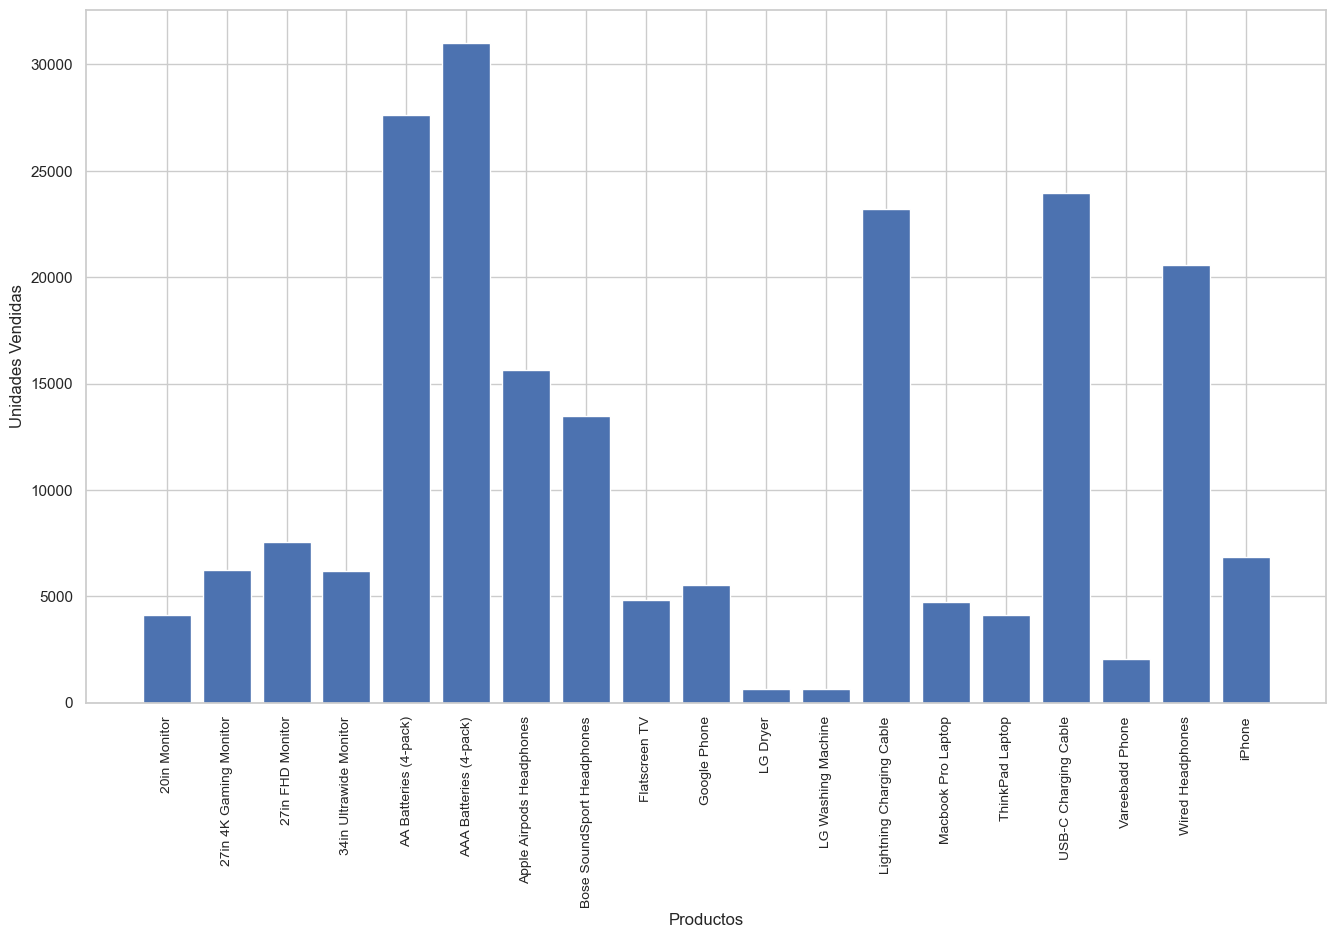

In [137]:
mpl.bar(products, quantity_order)
mpl.xticks(products, rotation='vertical', size=10)
mpl.xlabel('Productos')
mpl.ylabel('Unidades Vendidas')
mpl.show()

In [138]:
prices = data.groupby('producto').mean()['precio_unitario']
prices

C:\Users\jorge.callejo\AppData\Local\Temp\ipykernel_11980\3316543174.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = data.groupby('producto').mean()['precio_unitario']


producto
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: precio_unitario, dtype: float64

C:\Users\jorge.callejo\AppData\Local\Temp\ipykernel_11980\1510402365.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=10)
C:\Users\jorge.callejo\AppData\Local\Temp\ipykernel_11980\1510402365.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


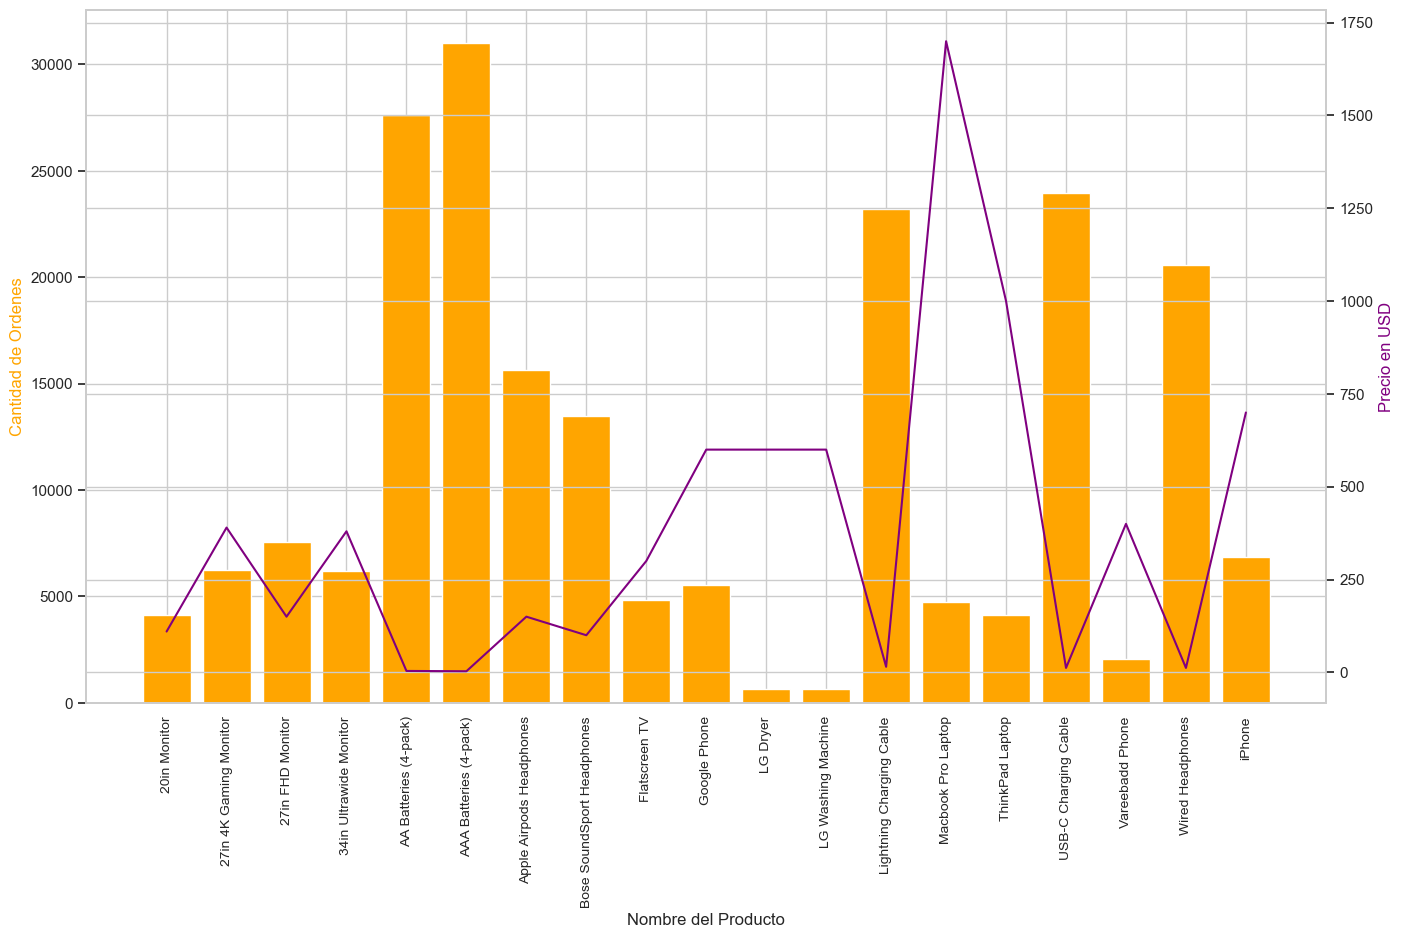

In [140]:
fig, ax1 = mpl.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_order, color = 'orange')
ax2.plot(products, prices, color = 'purple')

ax1.set_xlabel('Nombre del Producto')
ax1.set_ylabel('Cantidad de Ordenes', color = 'orange')
ax2.set_ylabel('Precio en USD', color='purple')
ax1.set_xticklabels(products, rotation='vertical', size=10)
fig.show()